# 2. praktiskais darbs

## 1. uzdevums
Peklē skaitlis raksturo attiecību starp siltumu, kas pārnests konvekcijas ceļā jeb siltākām molekulām tiekot fiziski pārvietotām ar šķidrumu, un siltumu kas tiek pārnests difūzijas ceļā jeb siltākām molekulām atduroties pret aukstākām un pārnesot kinētisko enerģiju tādā veidā.

Jo lielāks ir Peklē skaitlis, jo lielāka nozīme ir konvektīvajai siltuma pārnesei. Ja Peklē skaitlis ir ļoti liels, difūzos efektus var neņemt vērā.

Matemātiski Peklē skaitlis ir $$ Pe = \frac{L u \rho c_p}{k}$$
, kur $L$ - raksturīgais izmērs, $u$ - plūsmas ātrums, $\rho$ - šķidruma blīvums, $c_p$ - siltumietilpība, $k$ - siltumvadītspēja. Ir redzams, ka palielinot plūsmas ātrumu, palielinās Peklē skaitlis. Tas ir loģiski, jo, ja ir lielāks ātrums, vairāk molekulas tiks pārnestas konvektīvā veidā.



## 2. un 3. uzdevuma grafiki

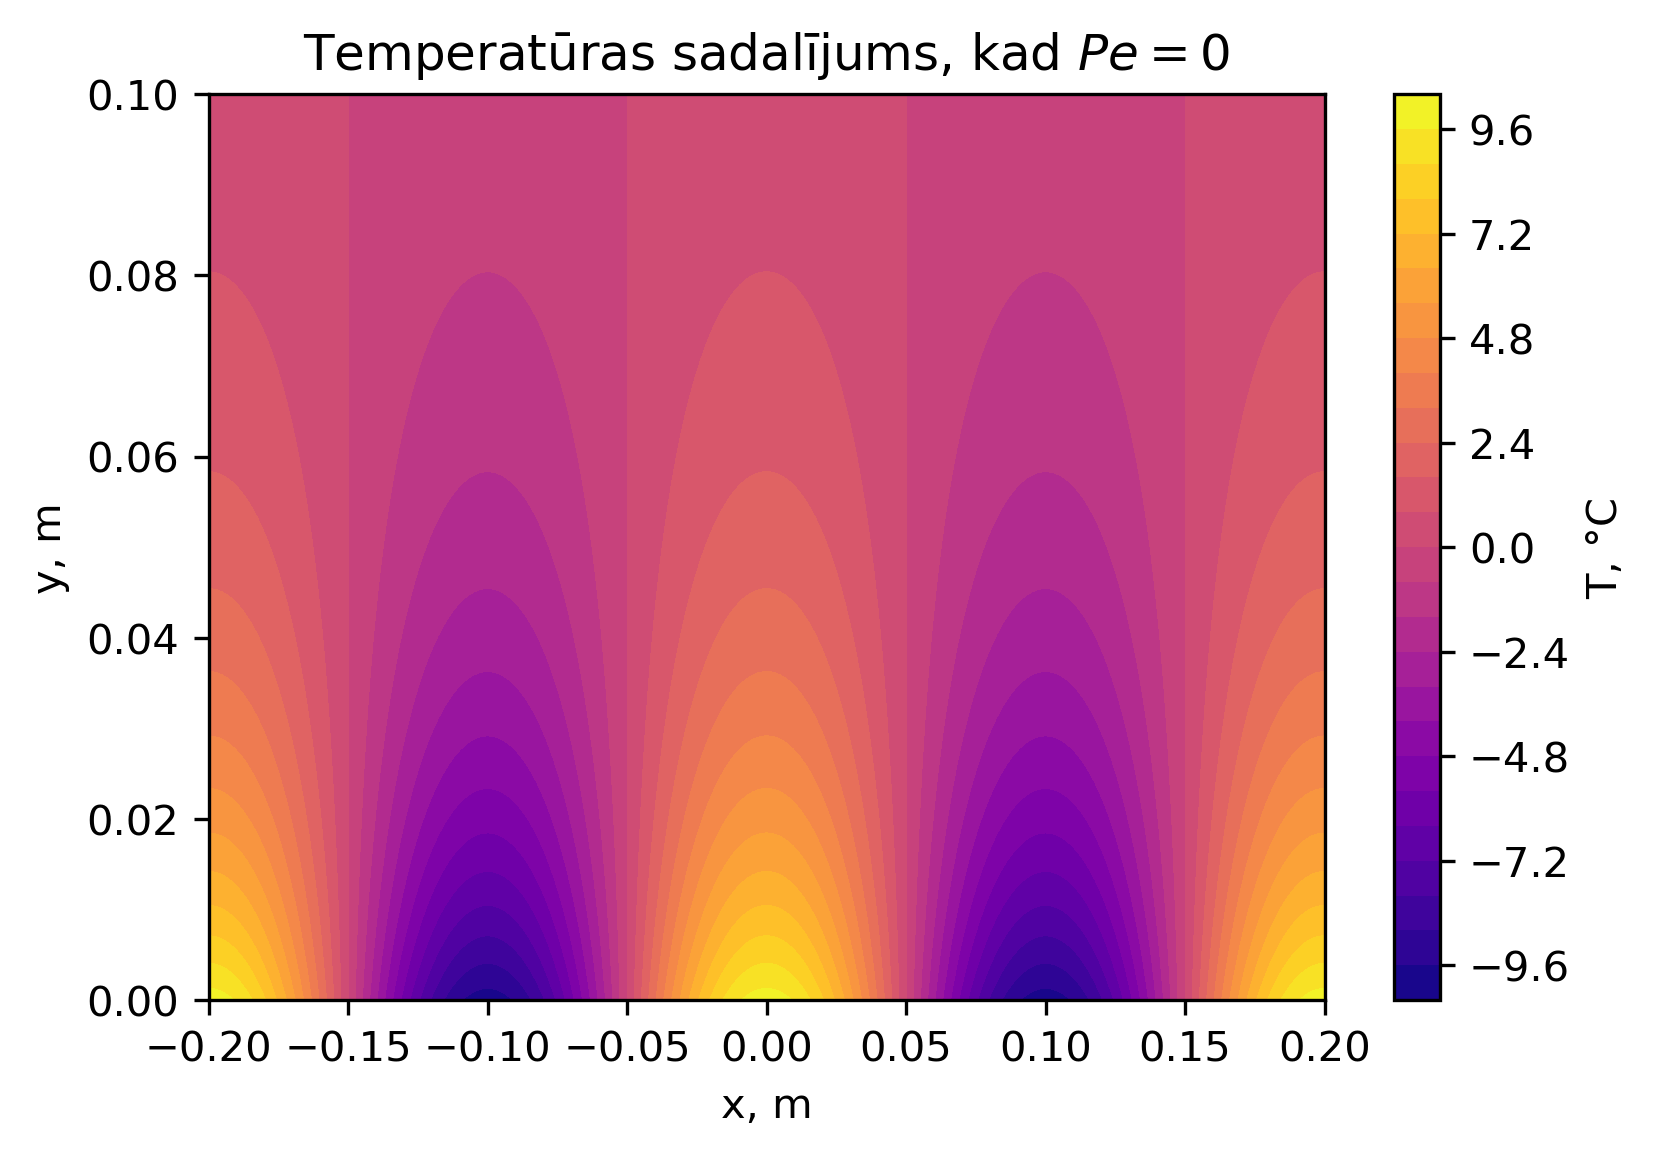

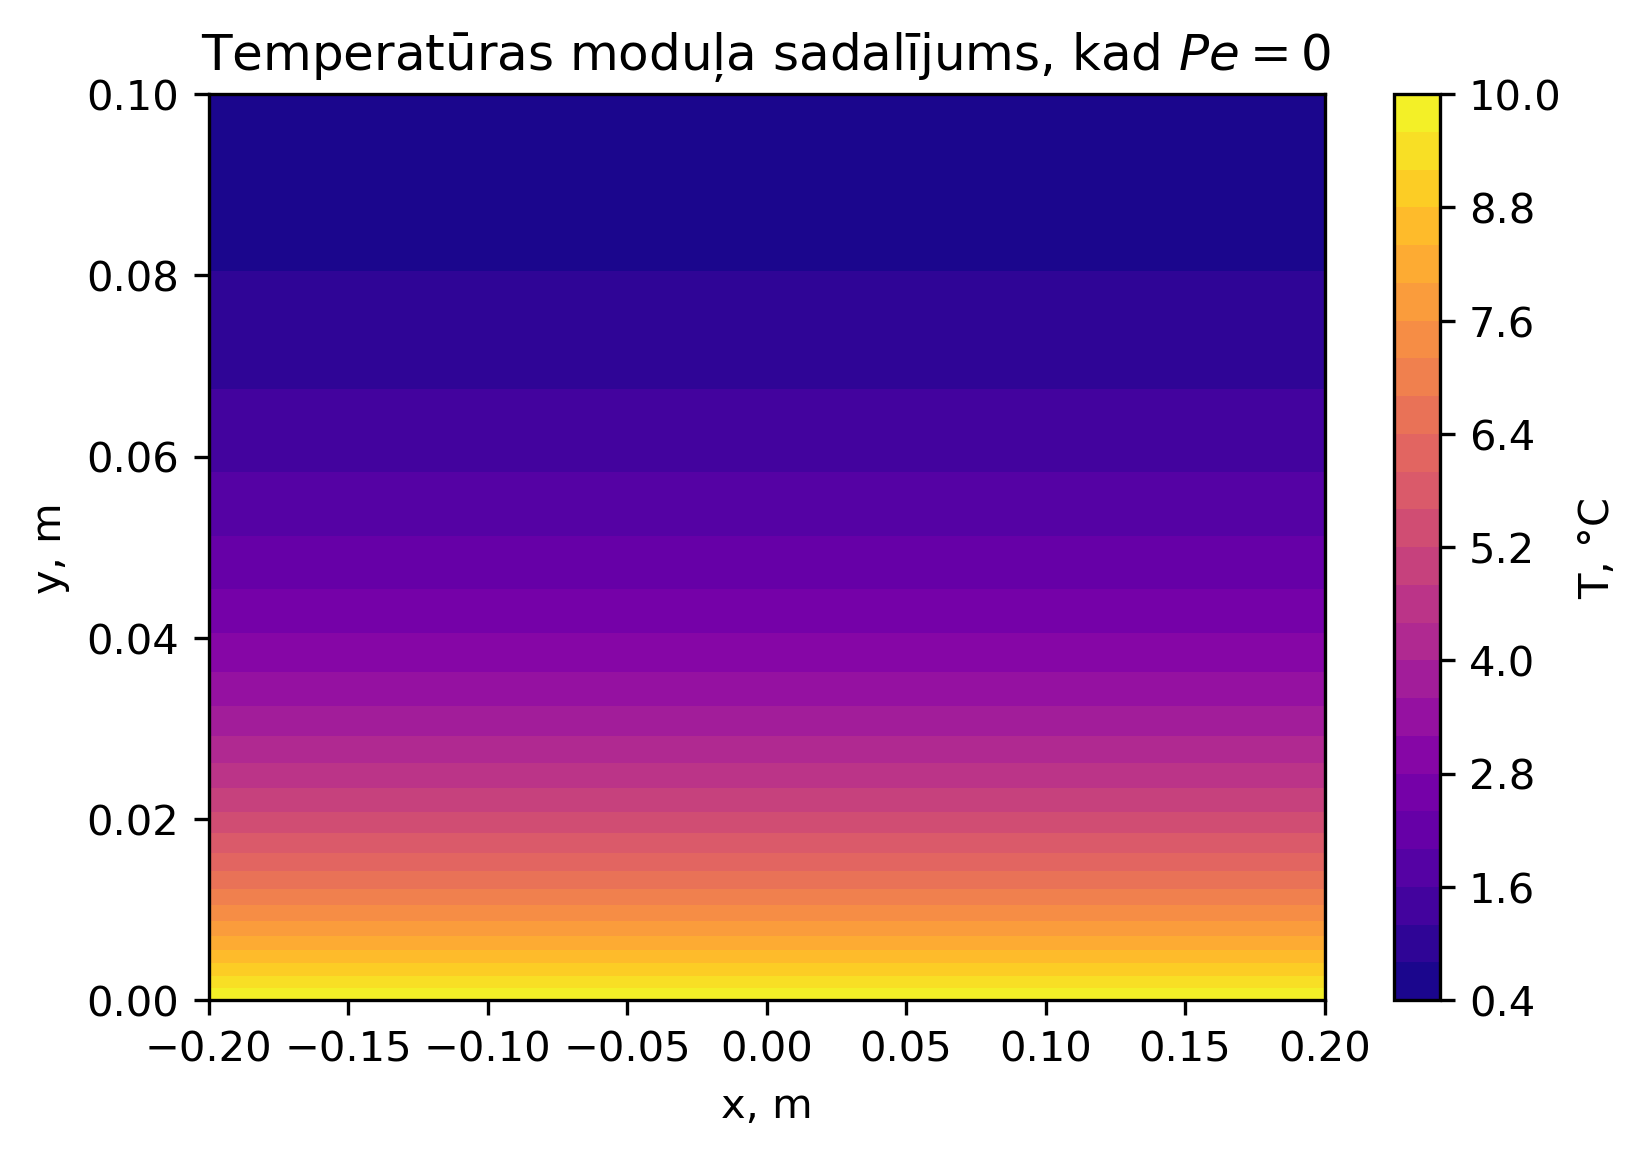

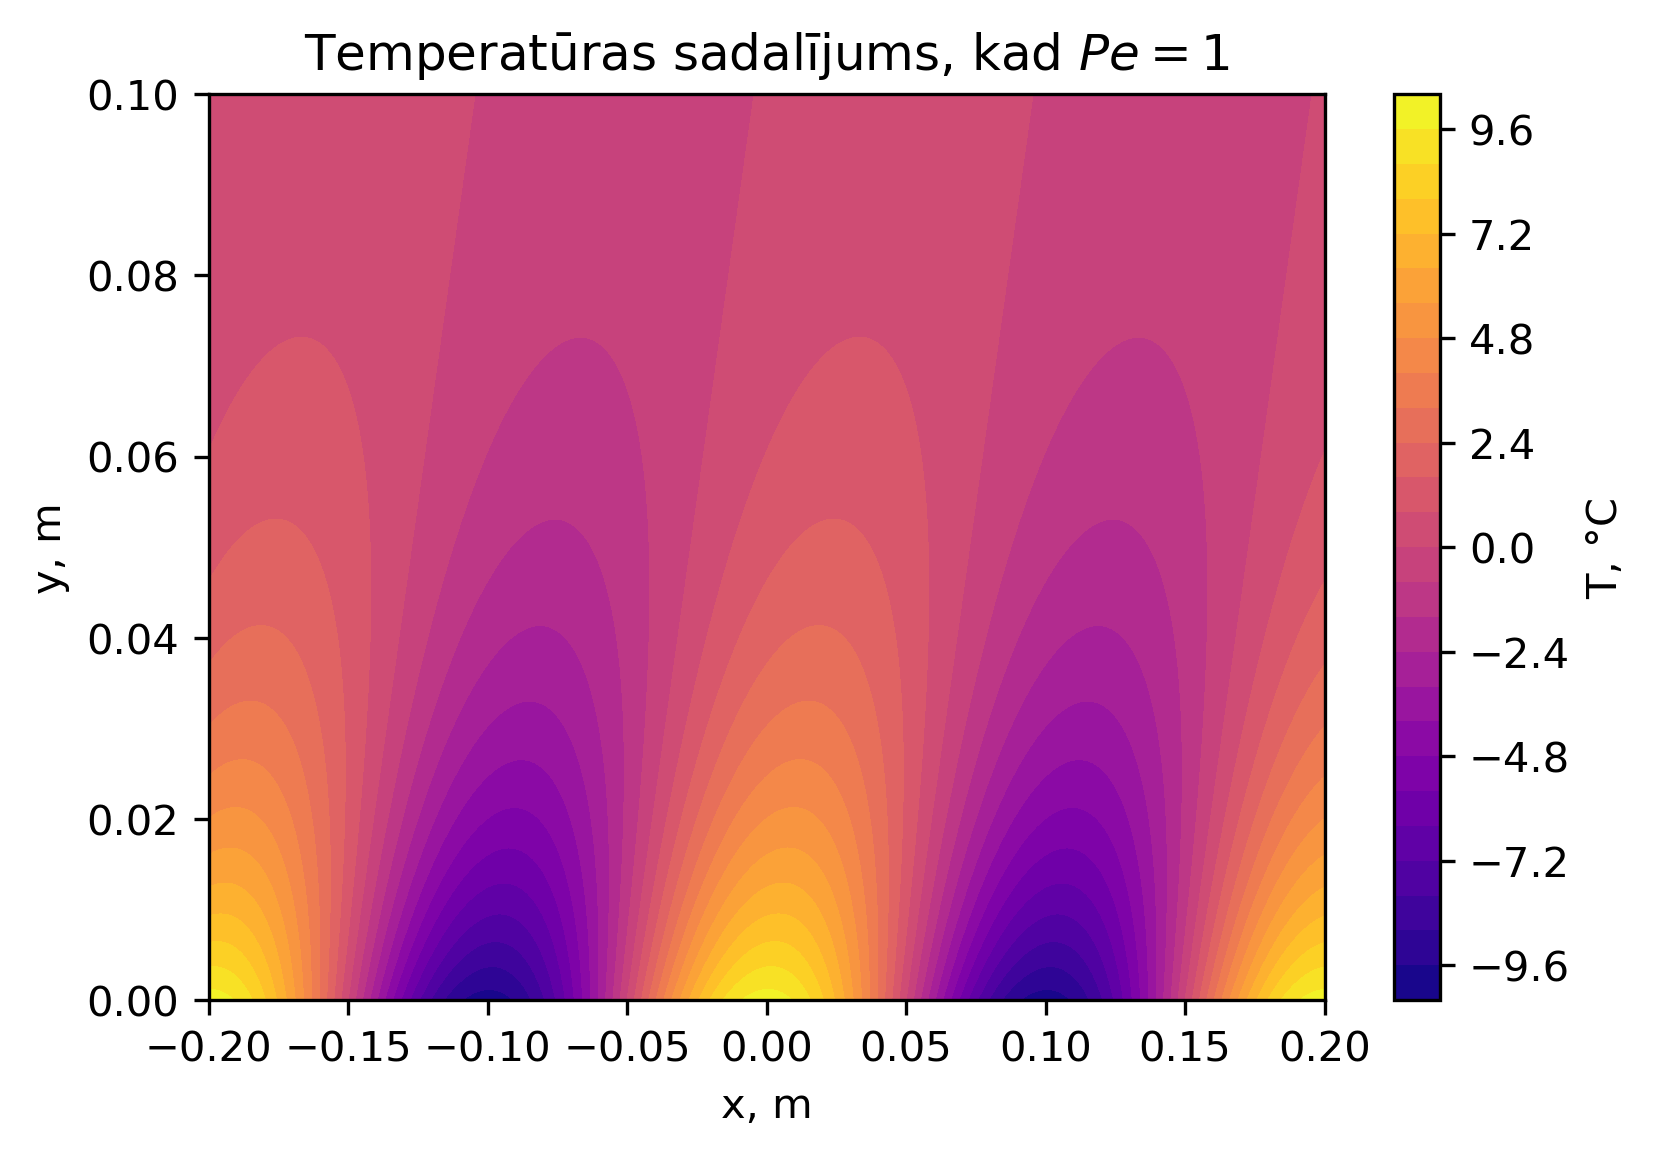

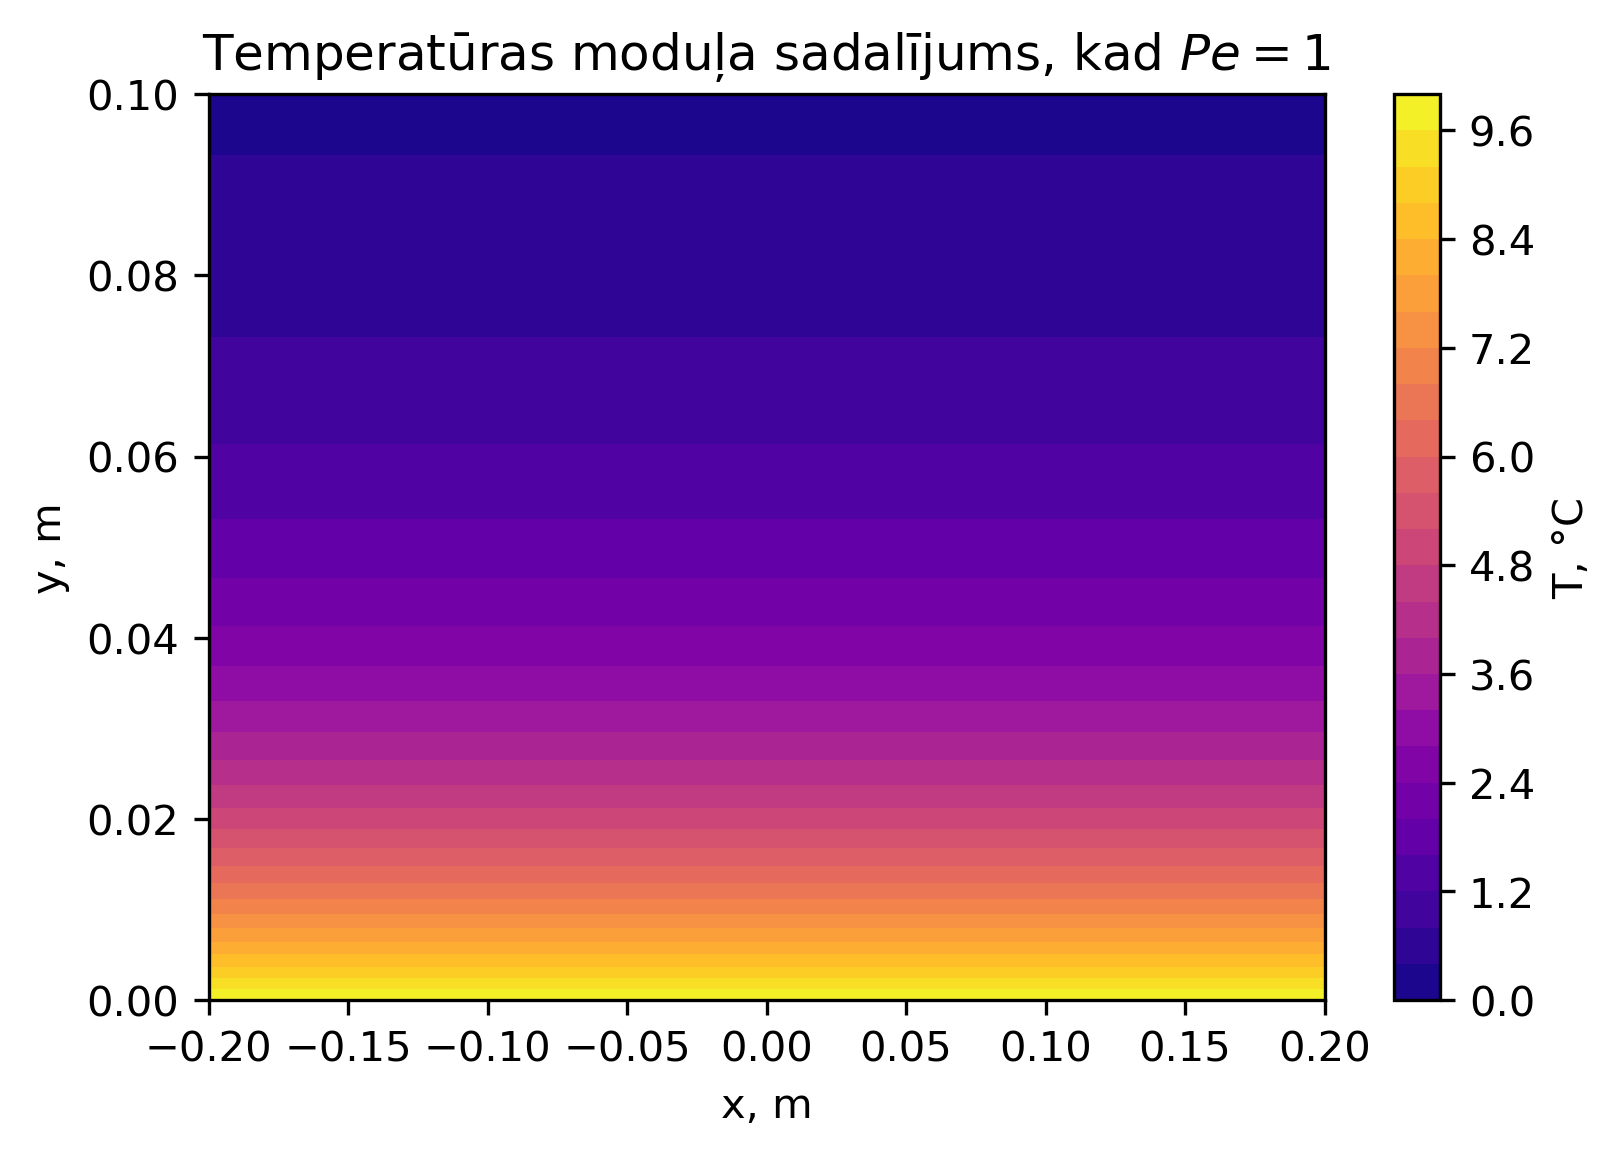

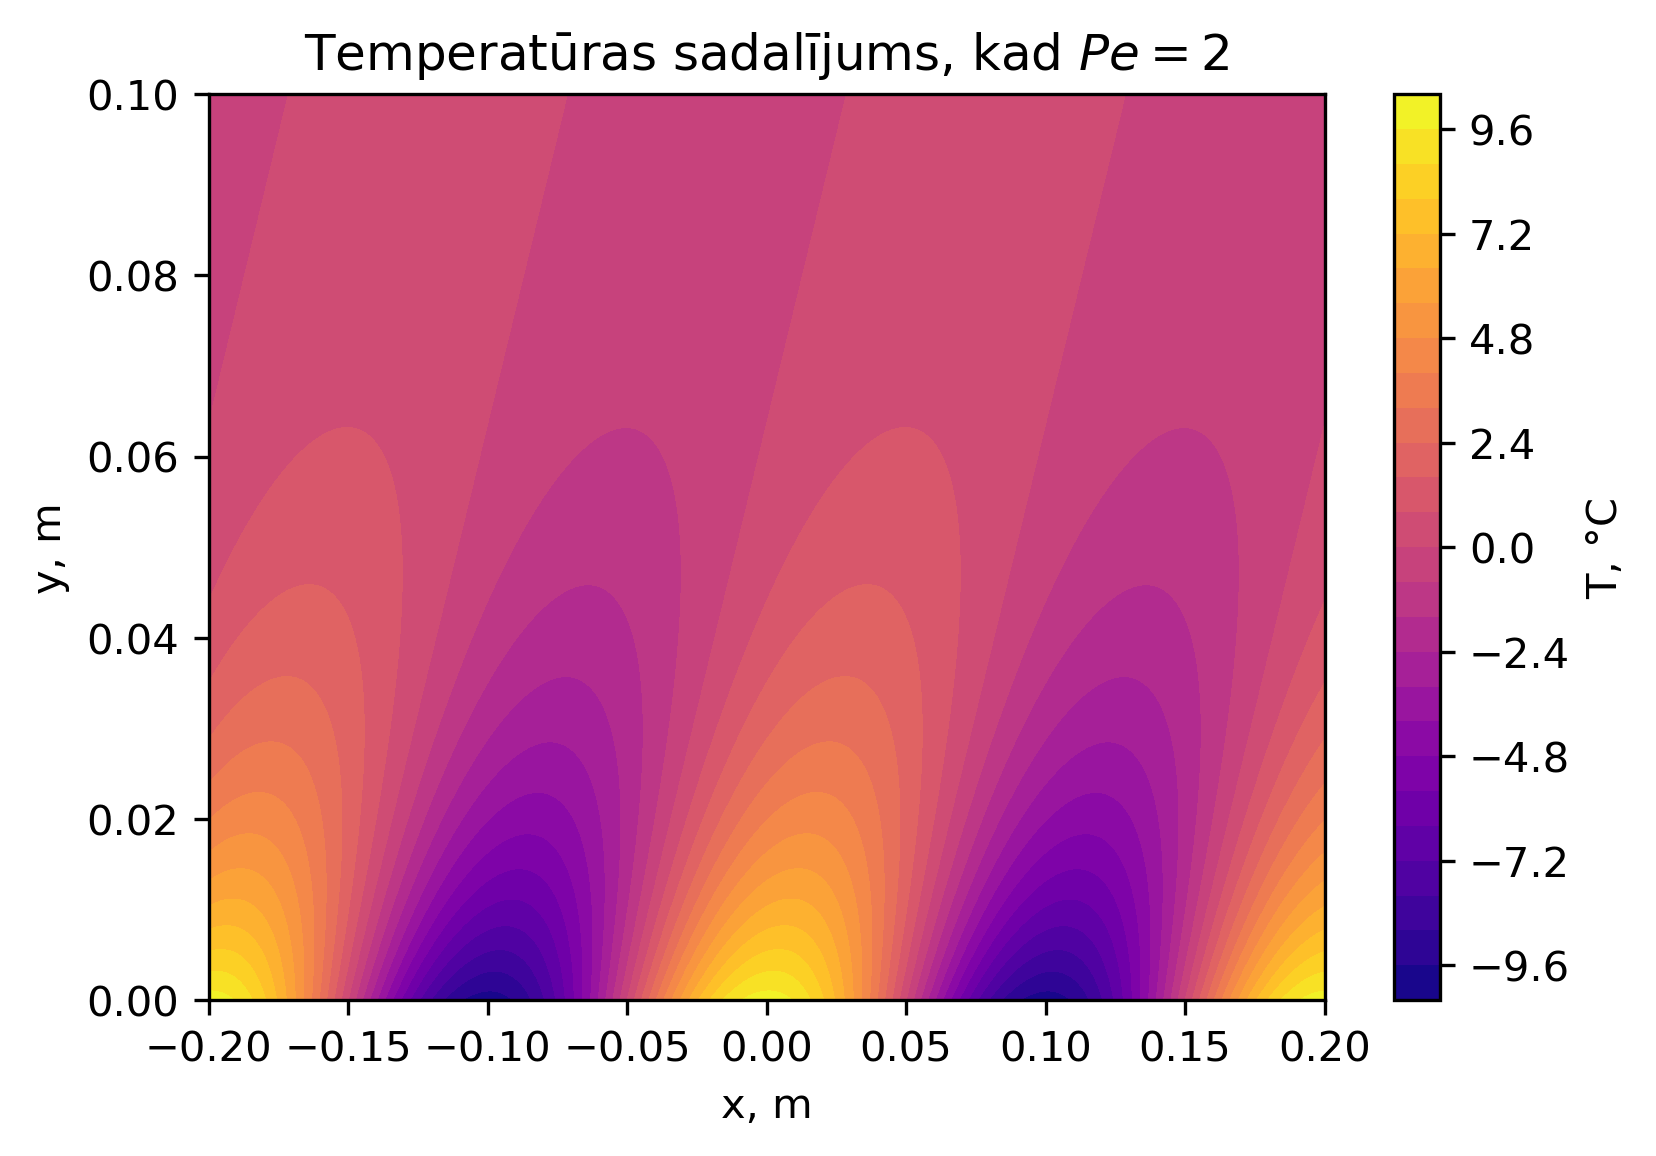

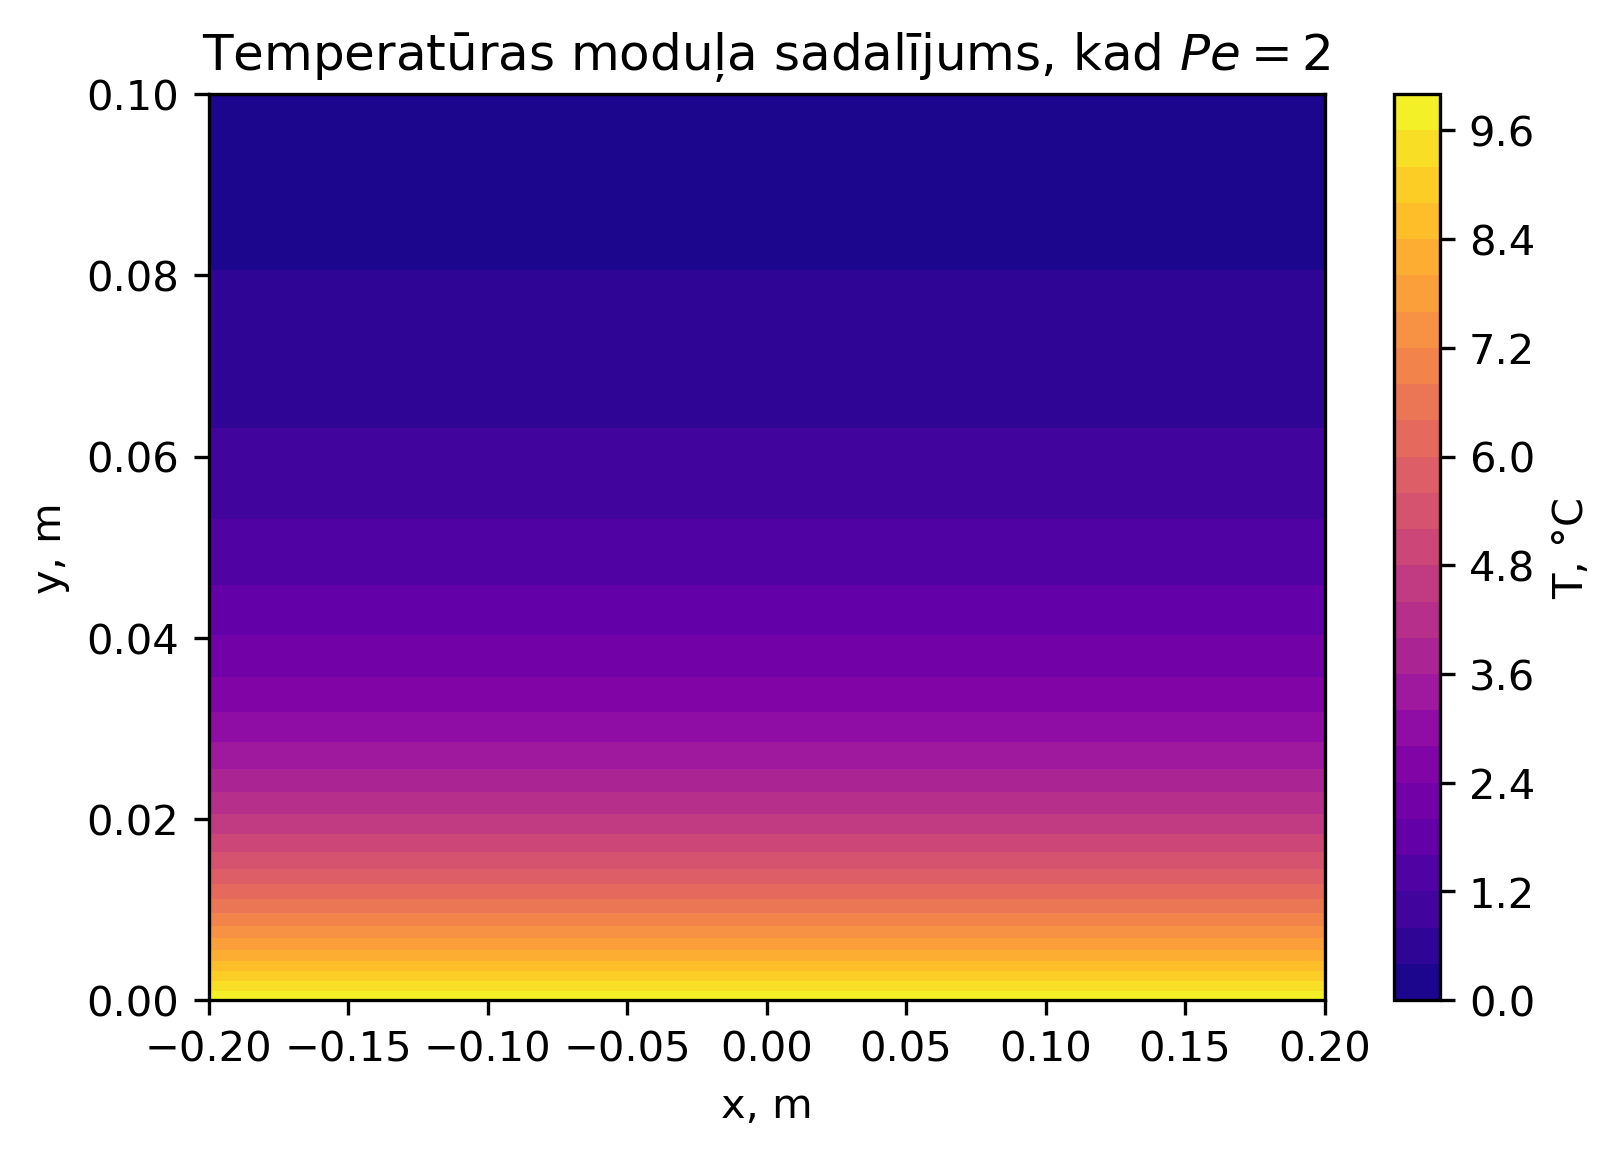

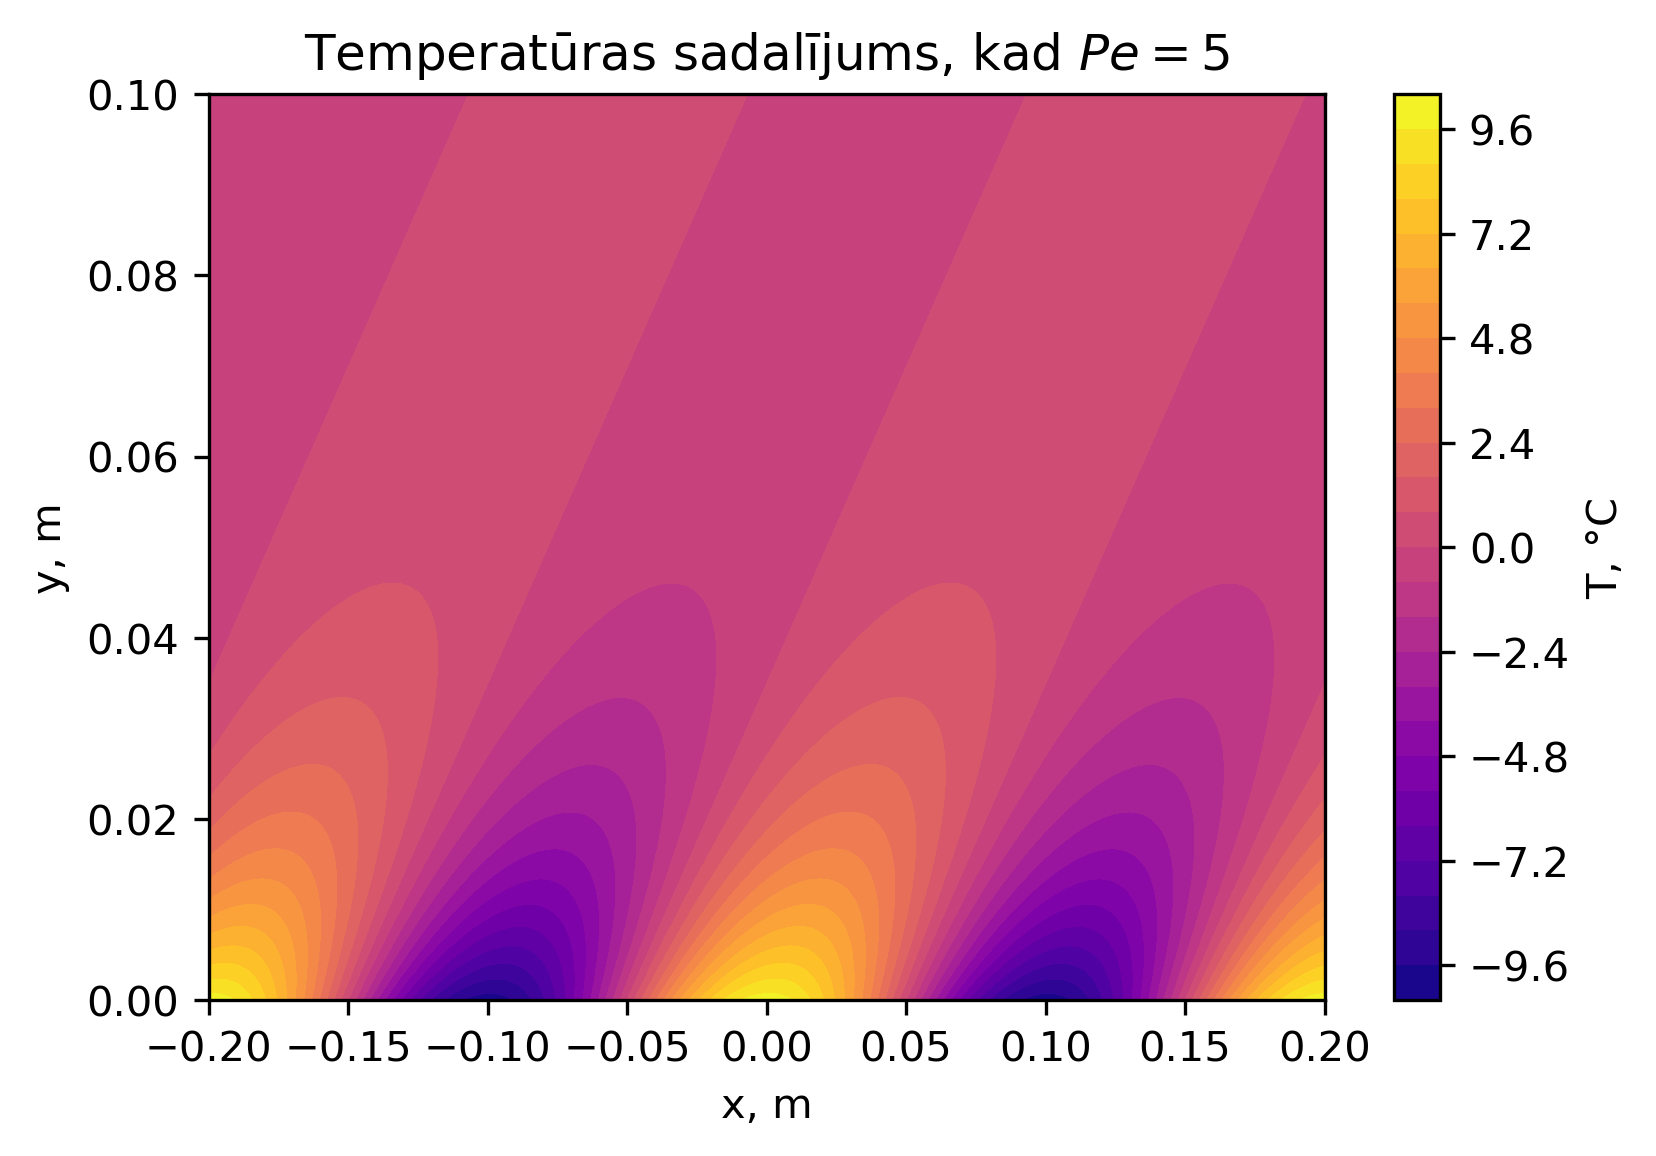

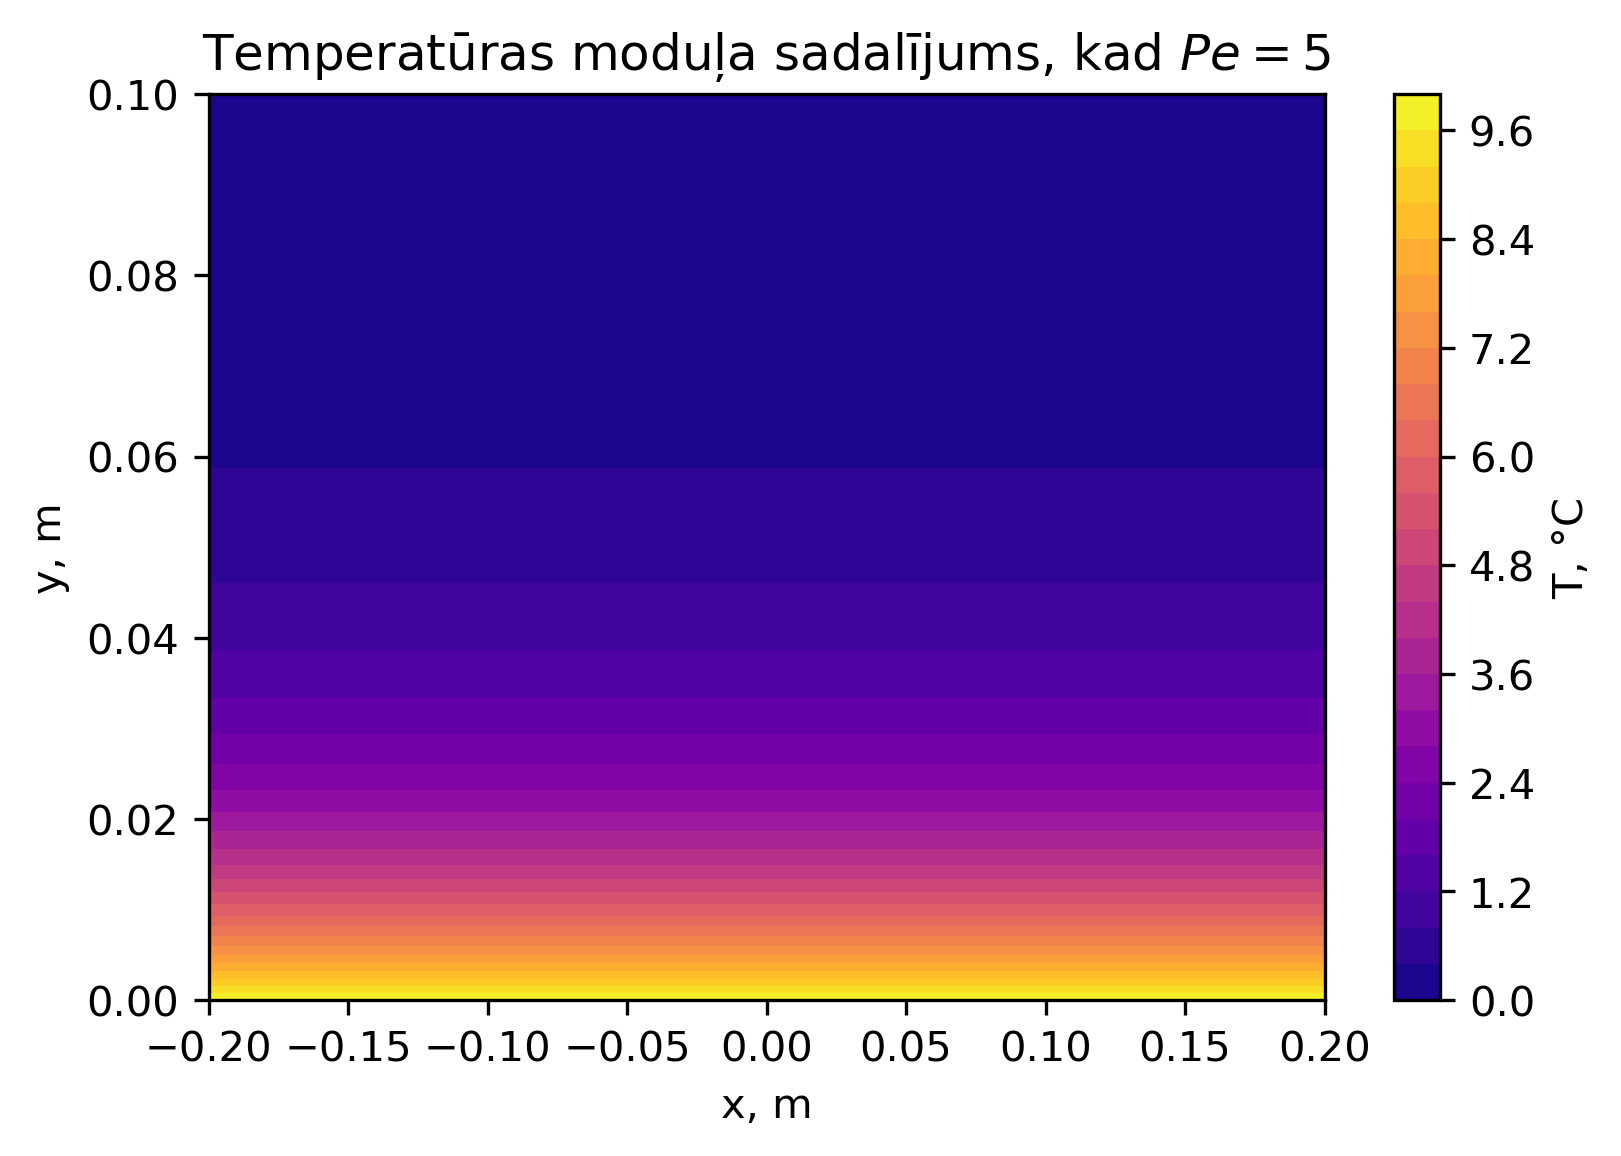

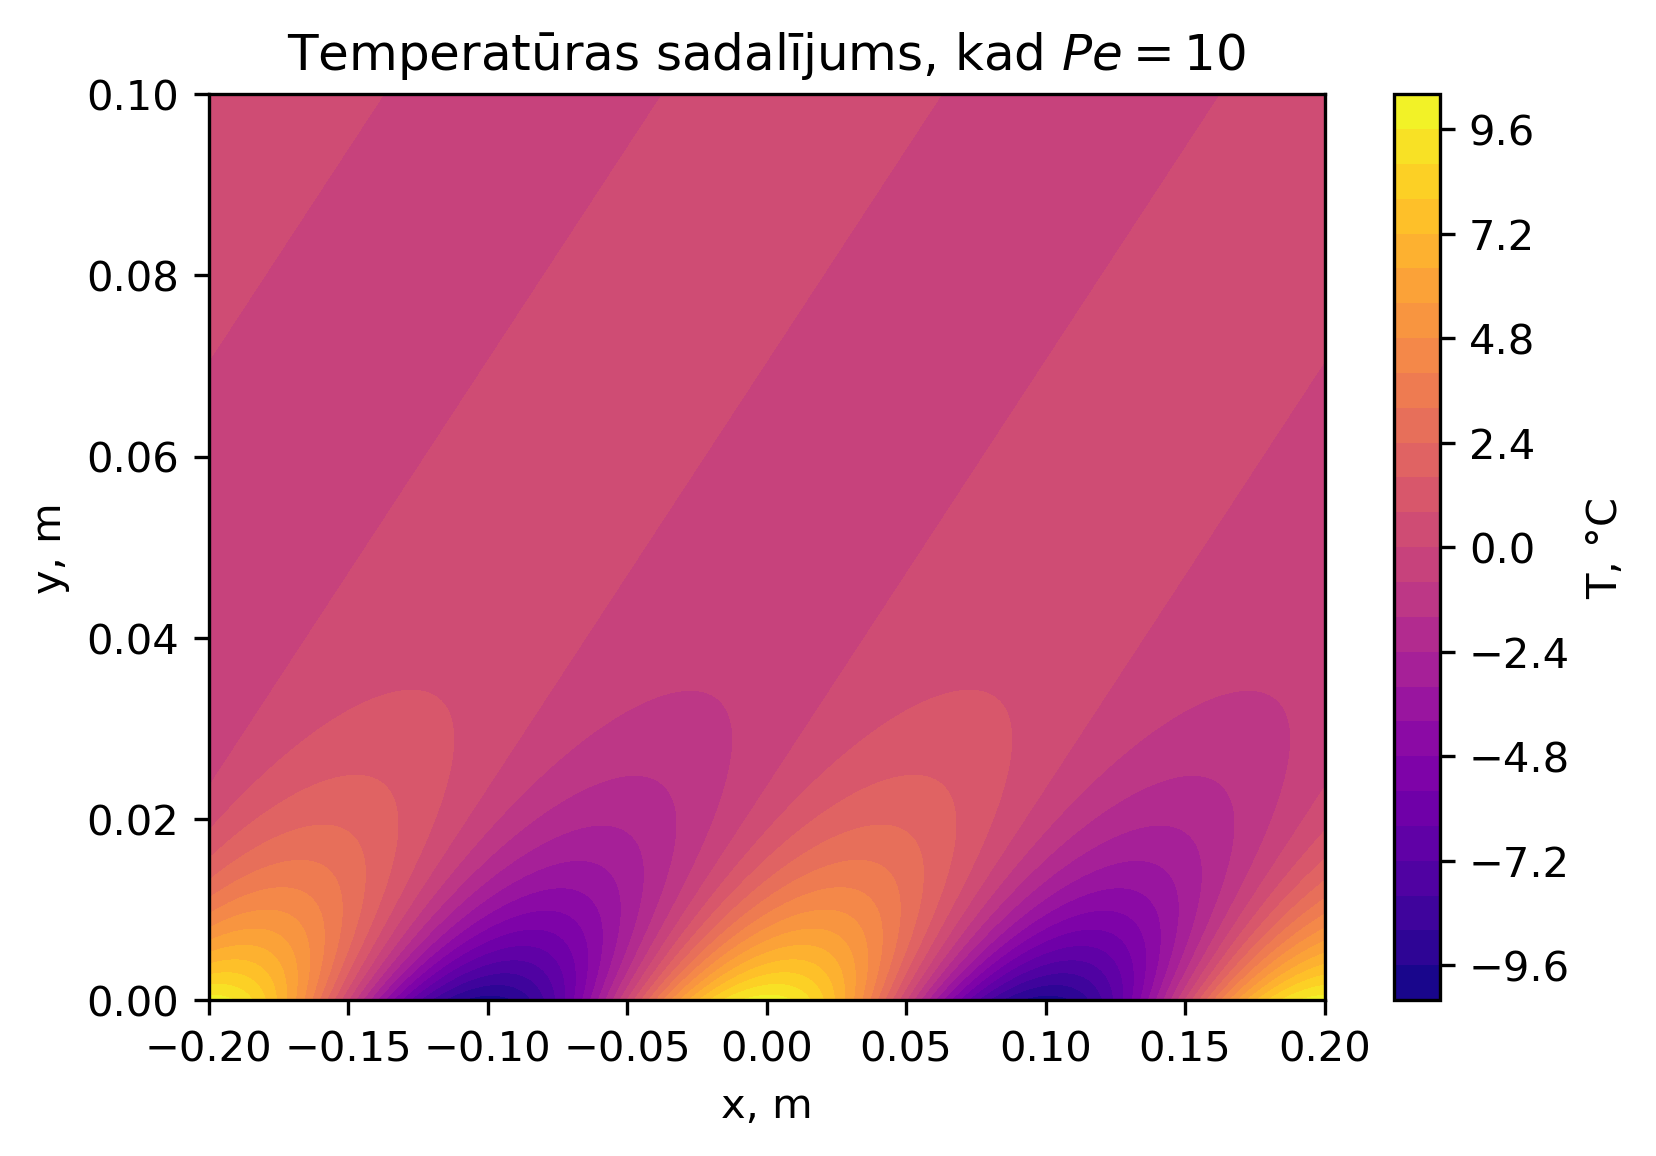

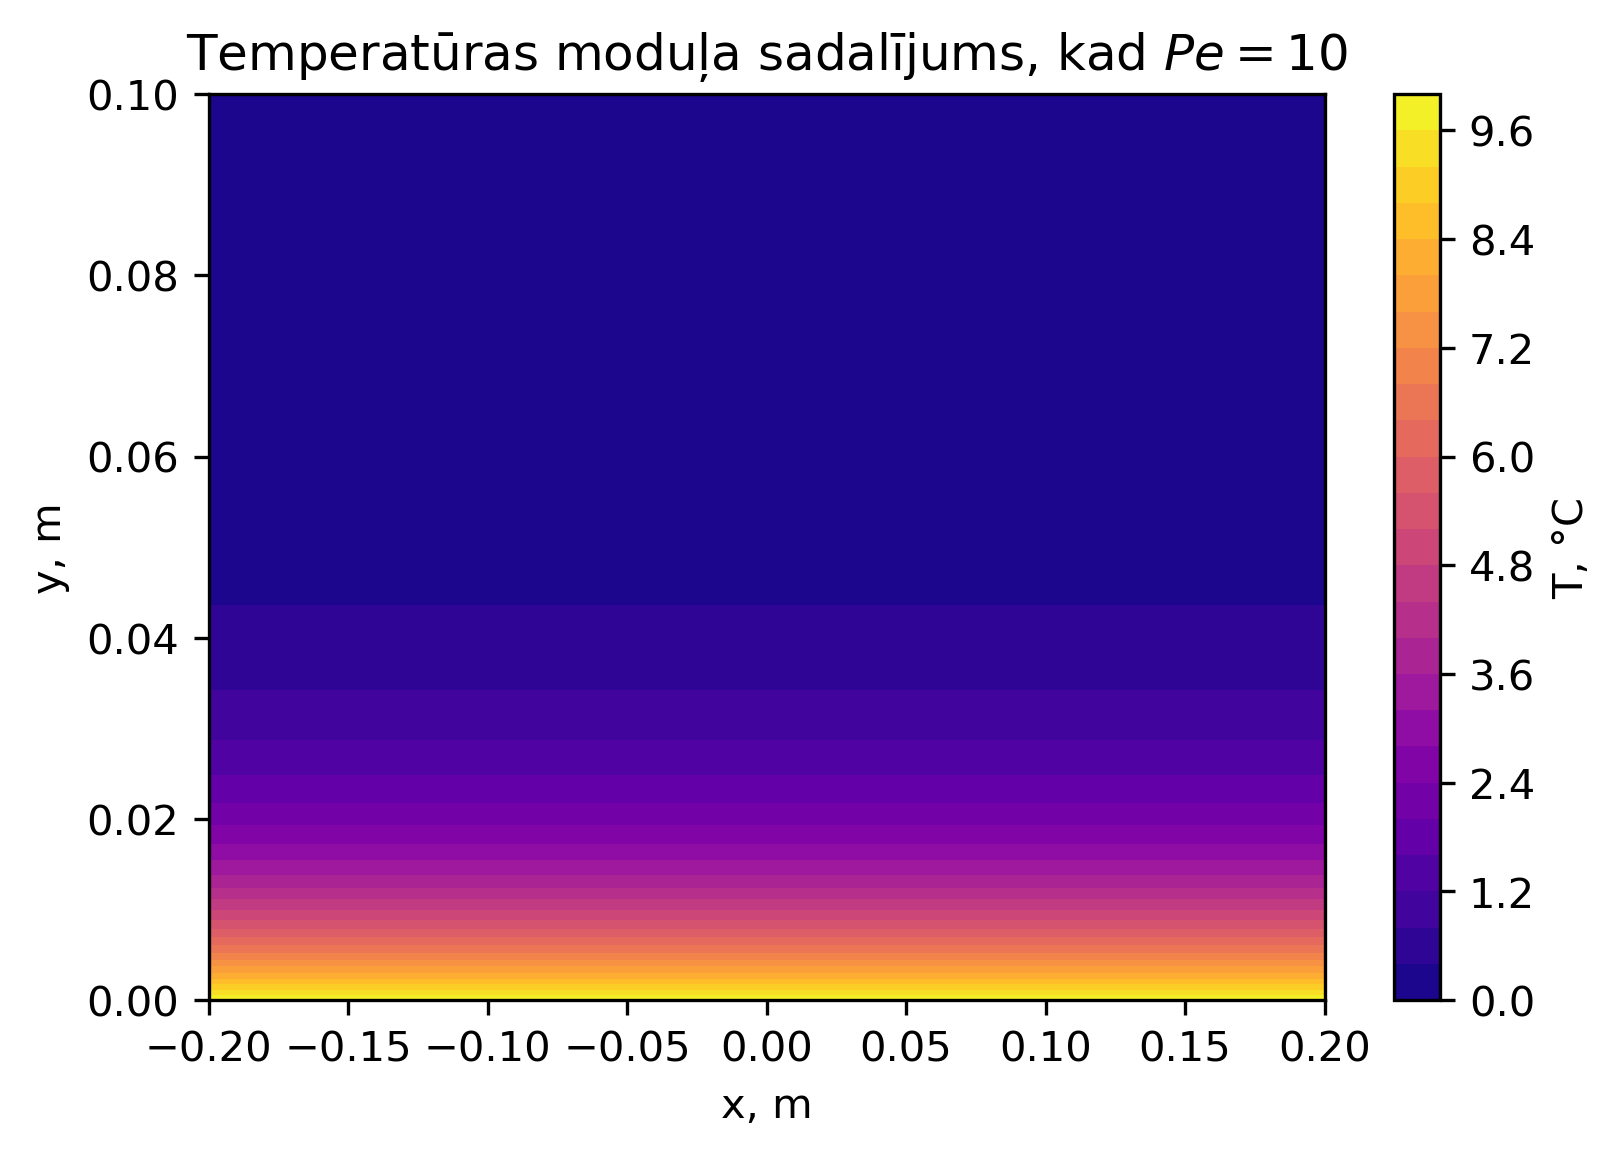

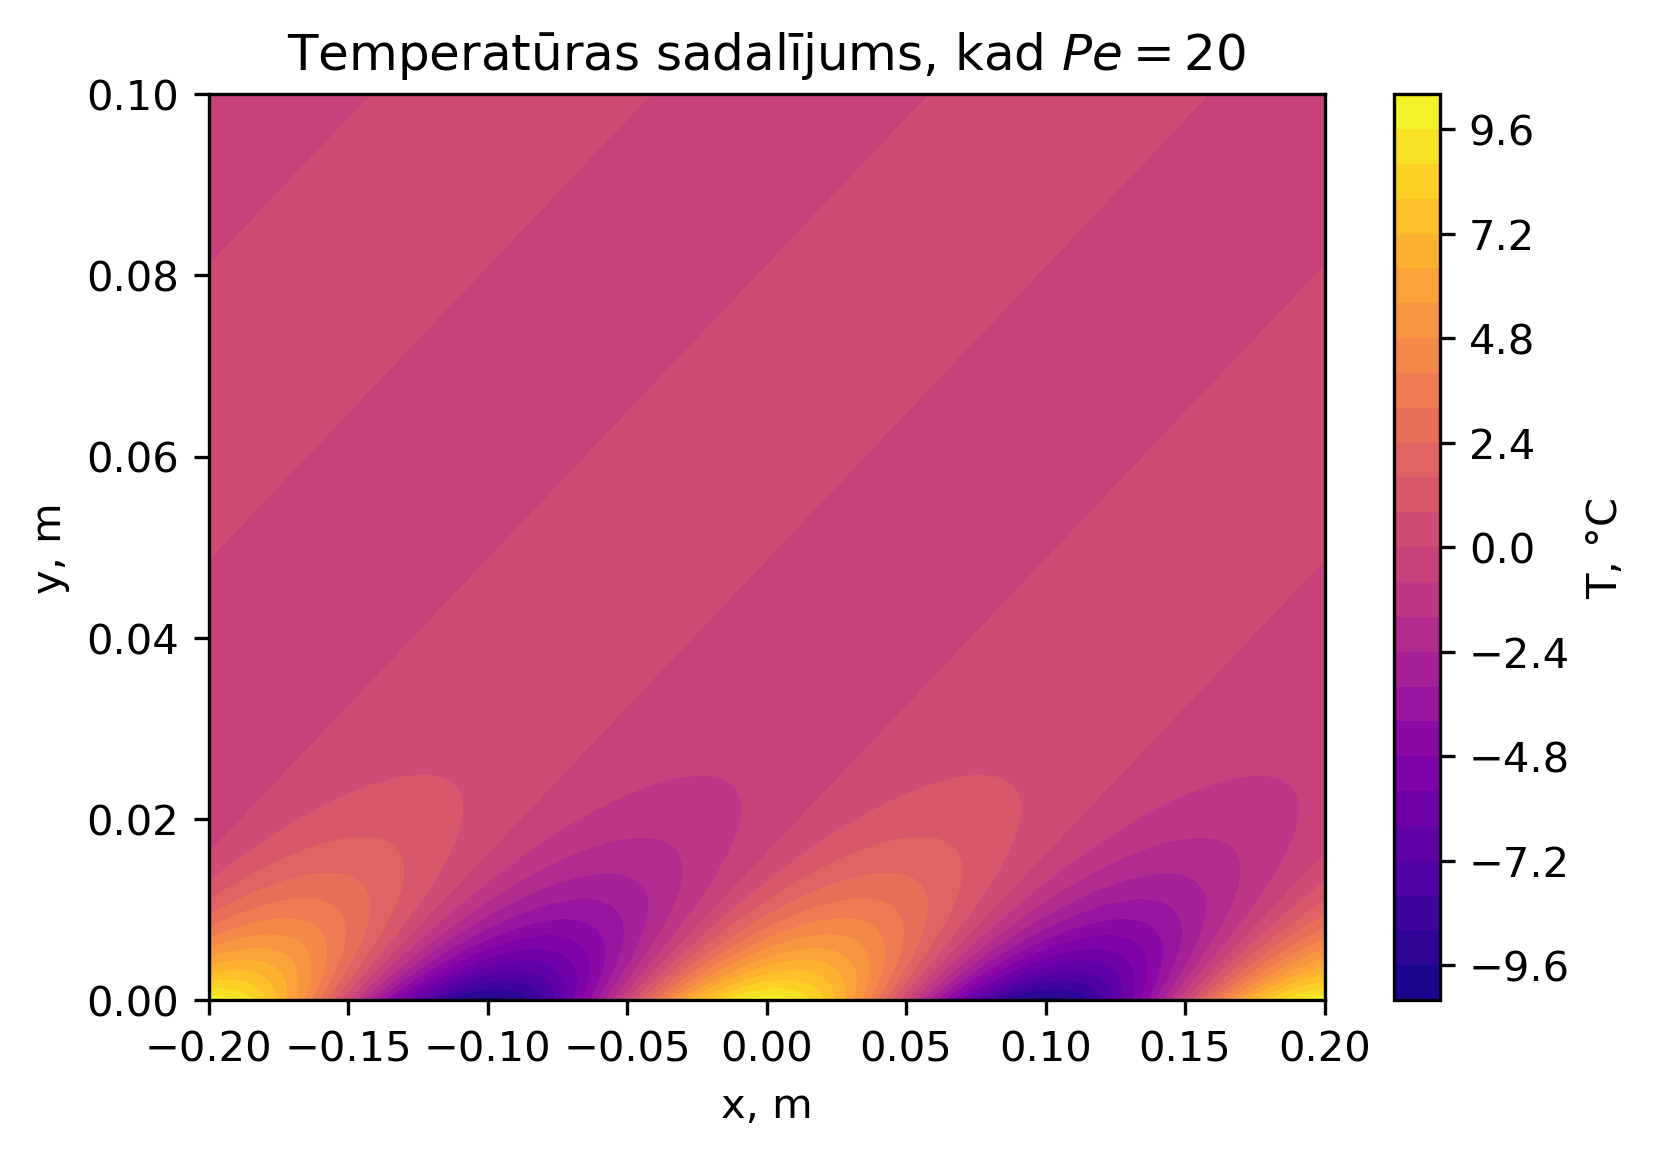

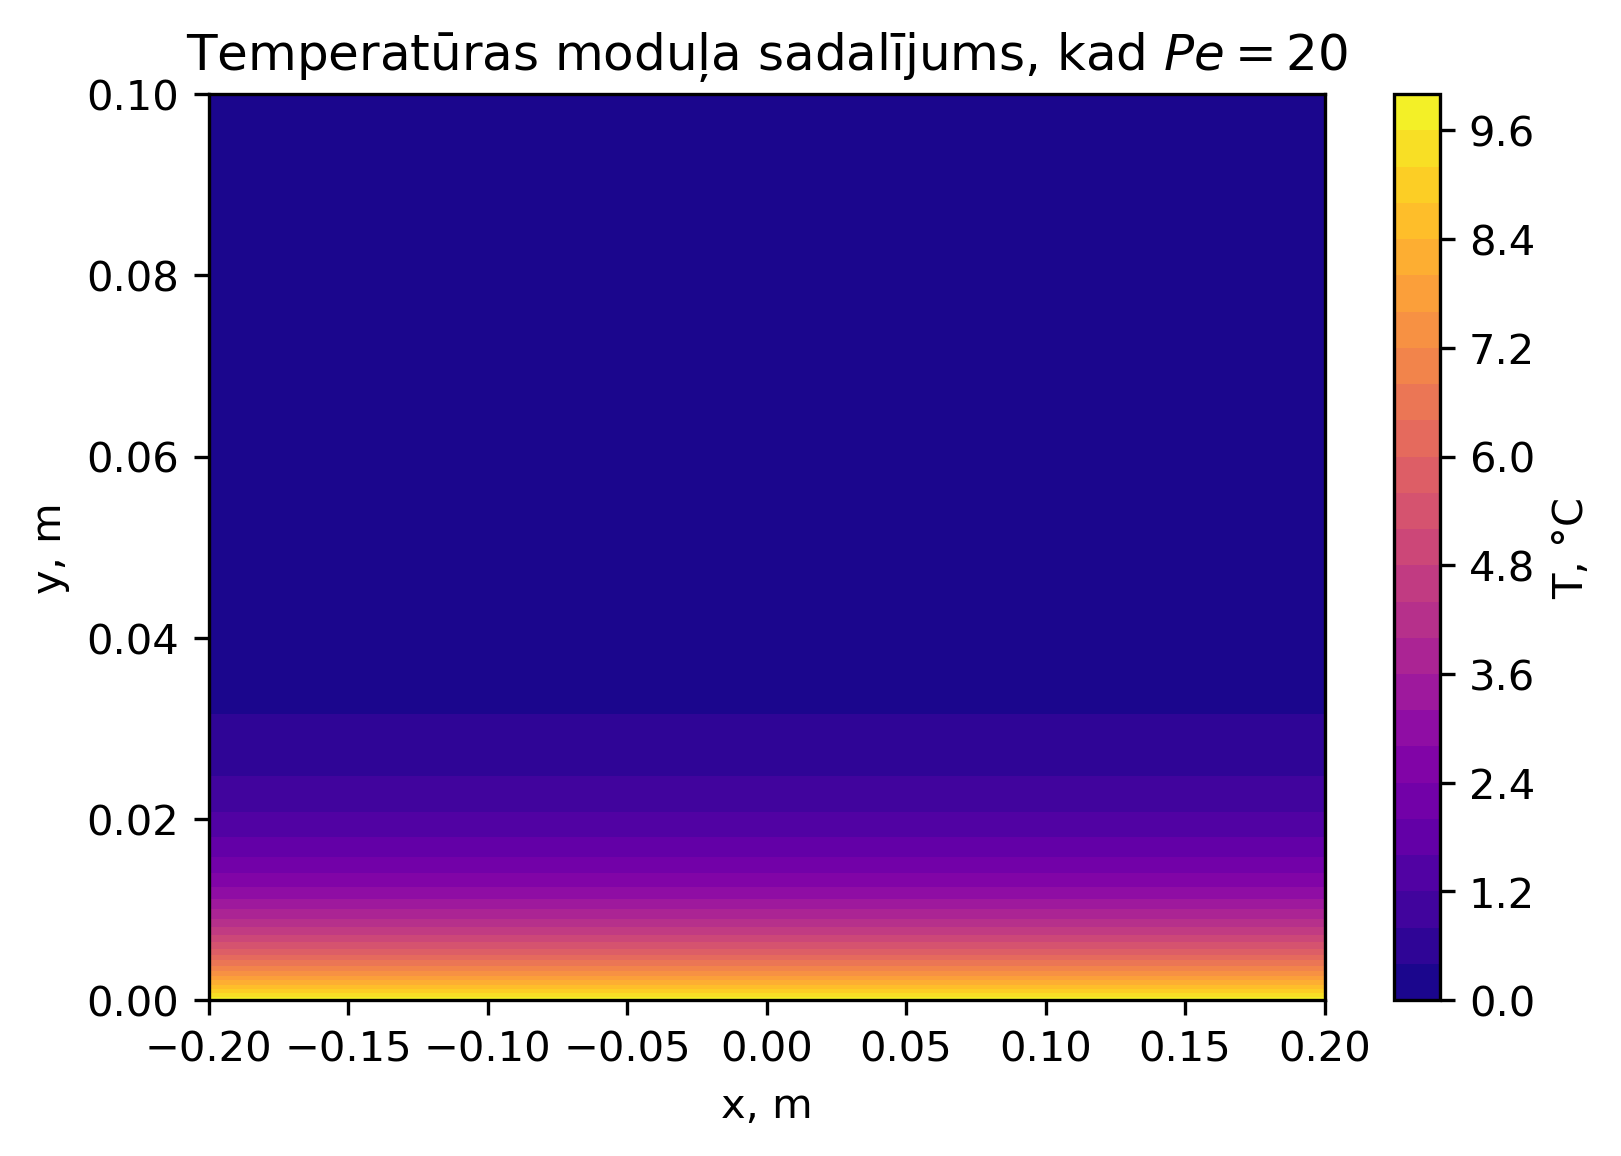

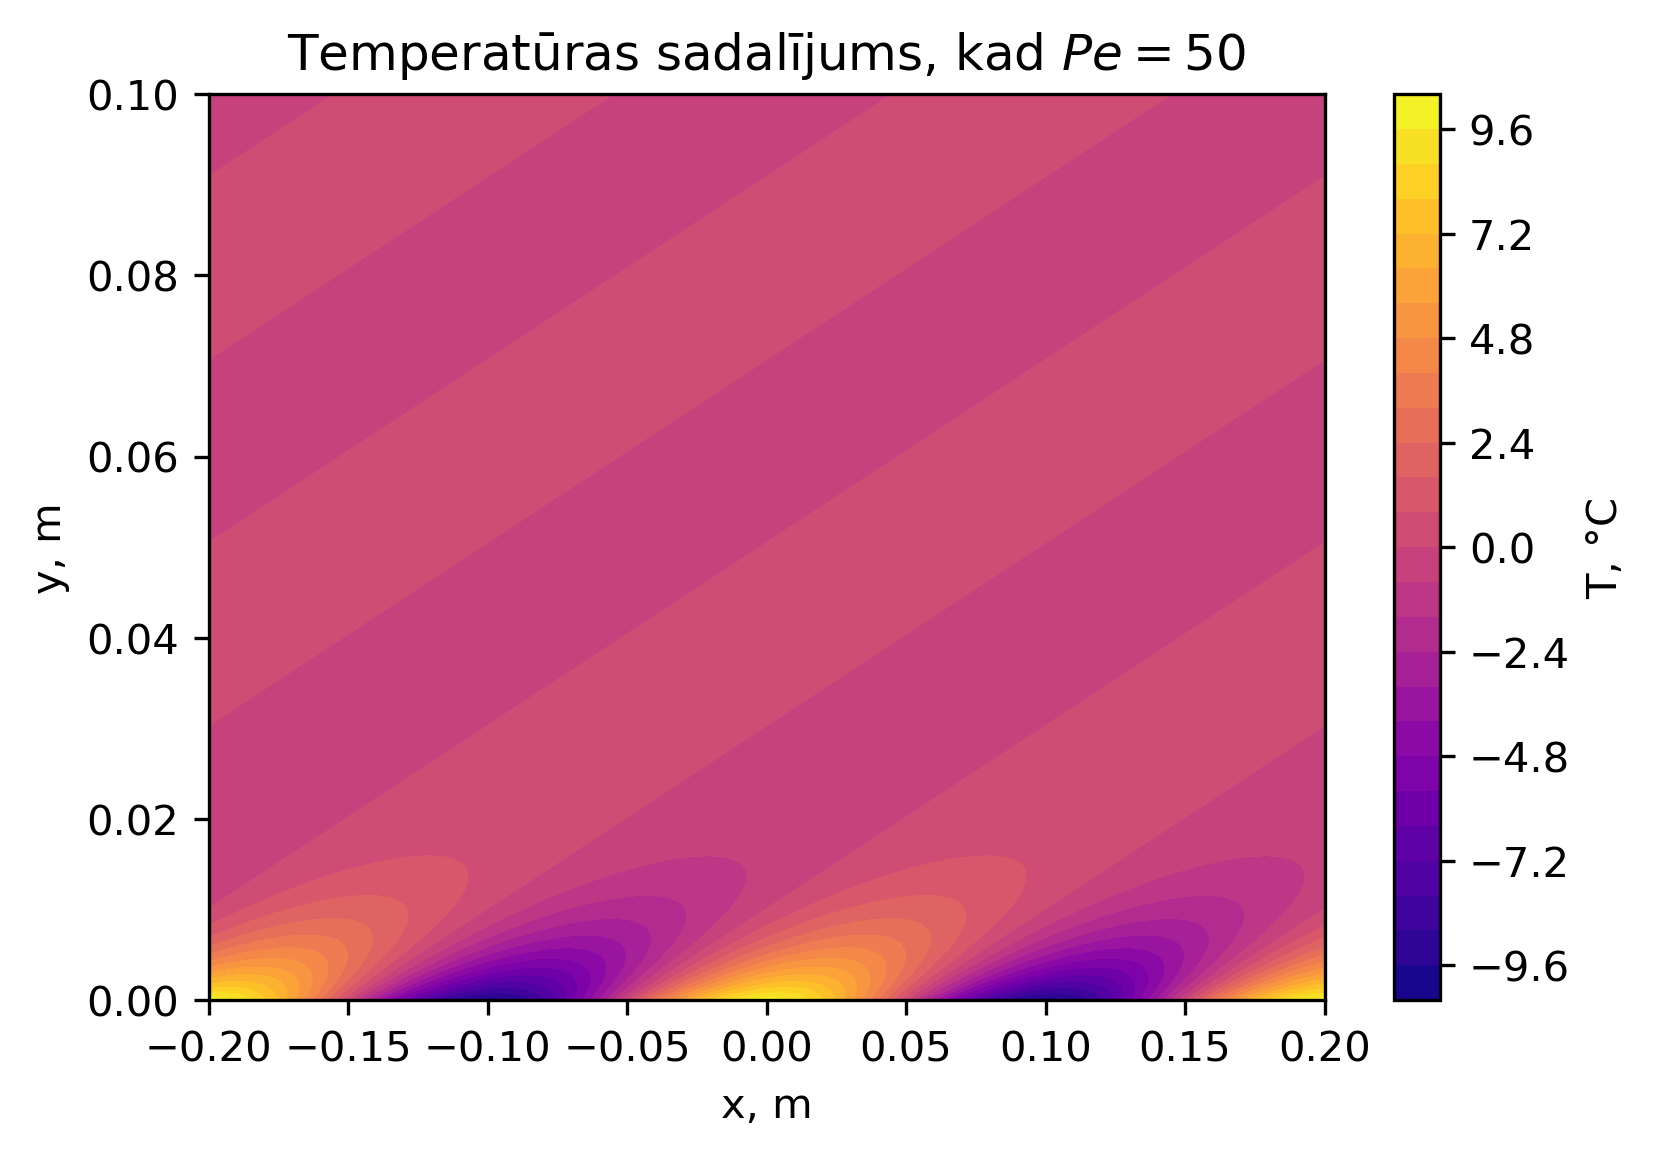

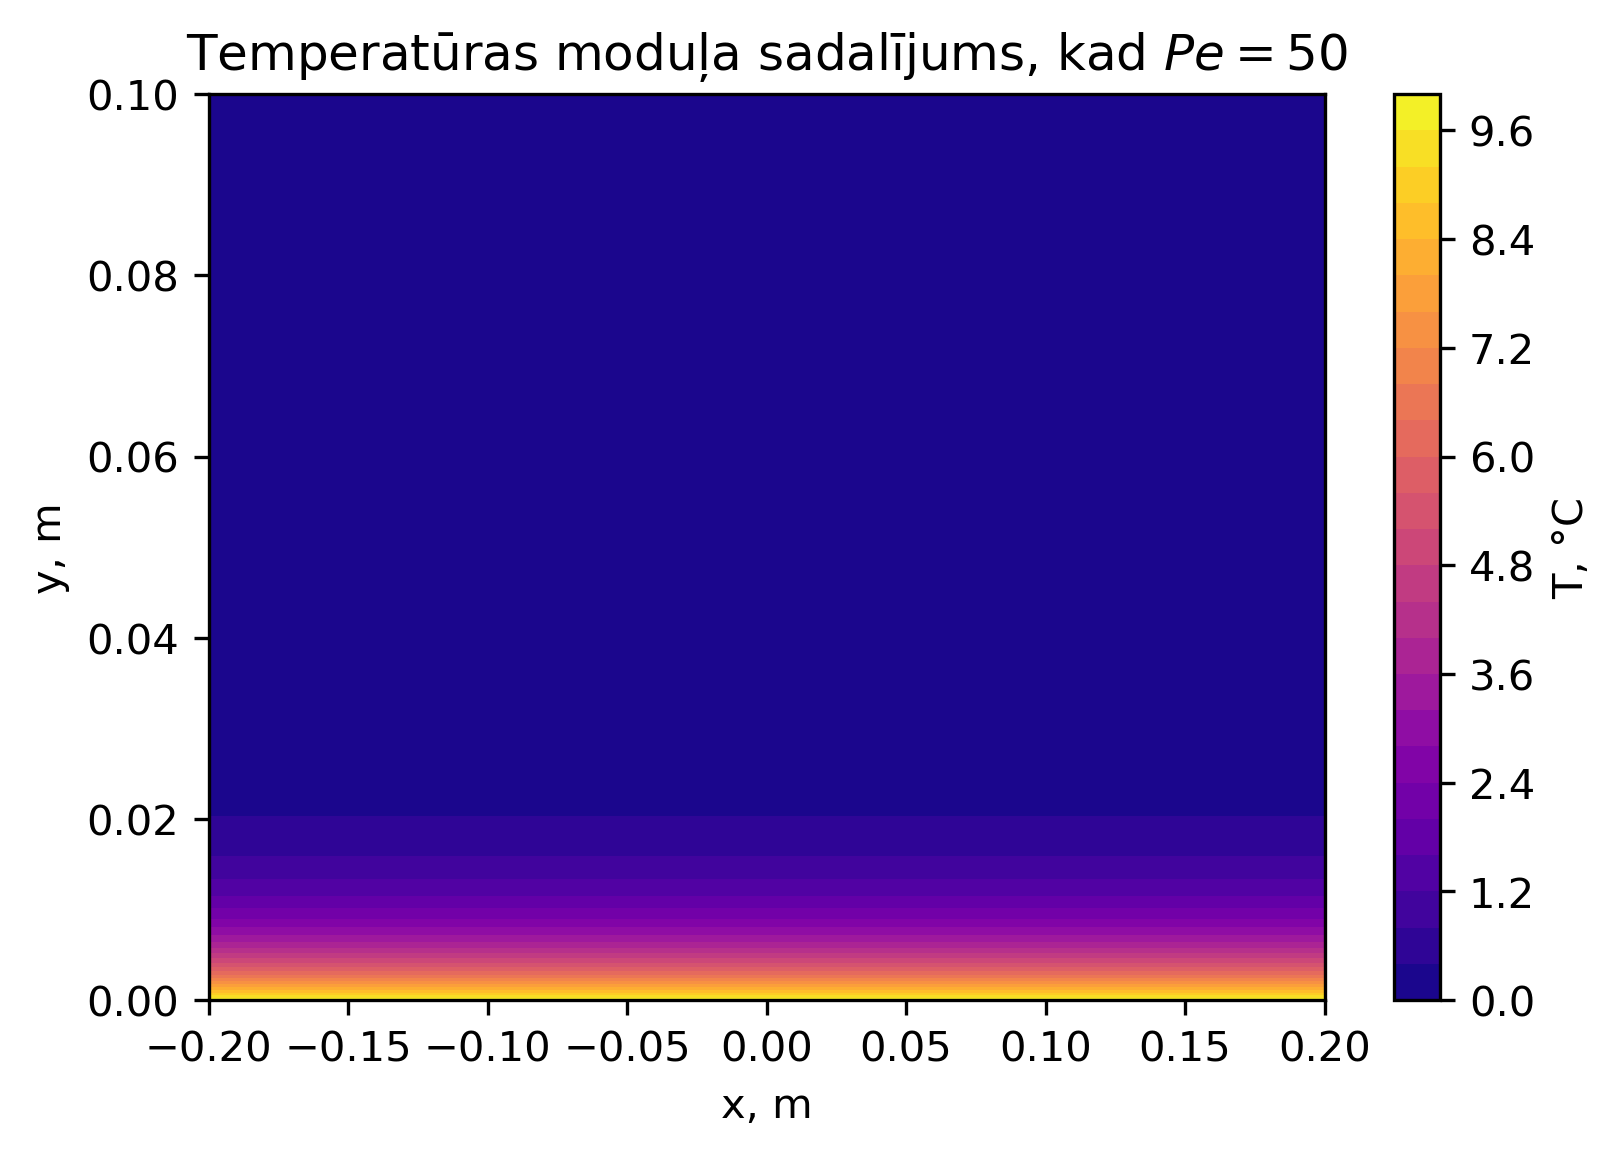

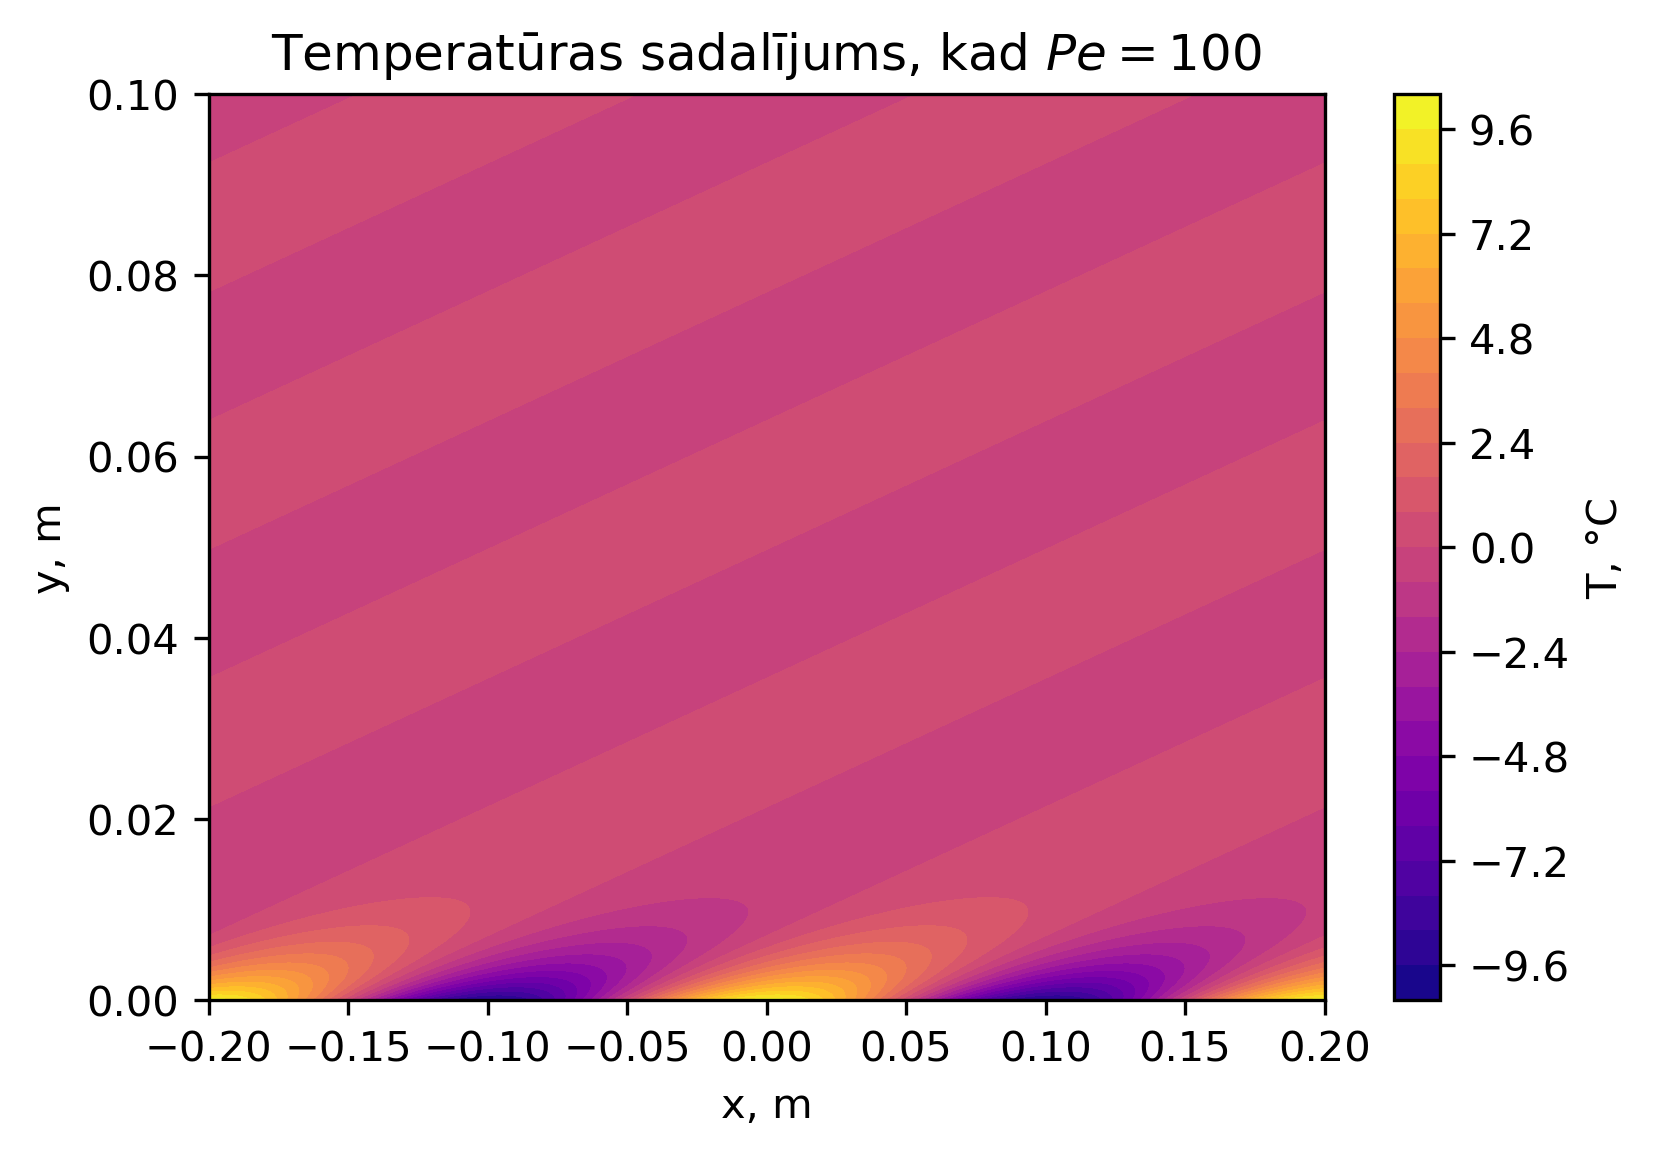

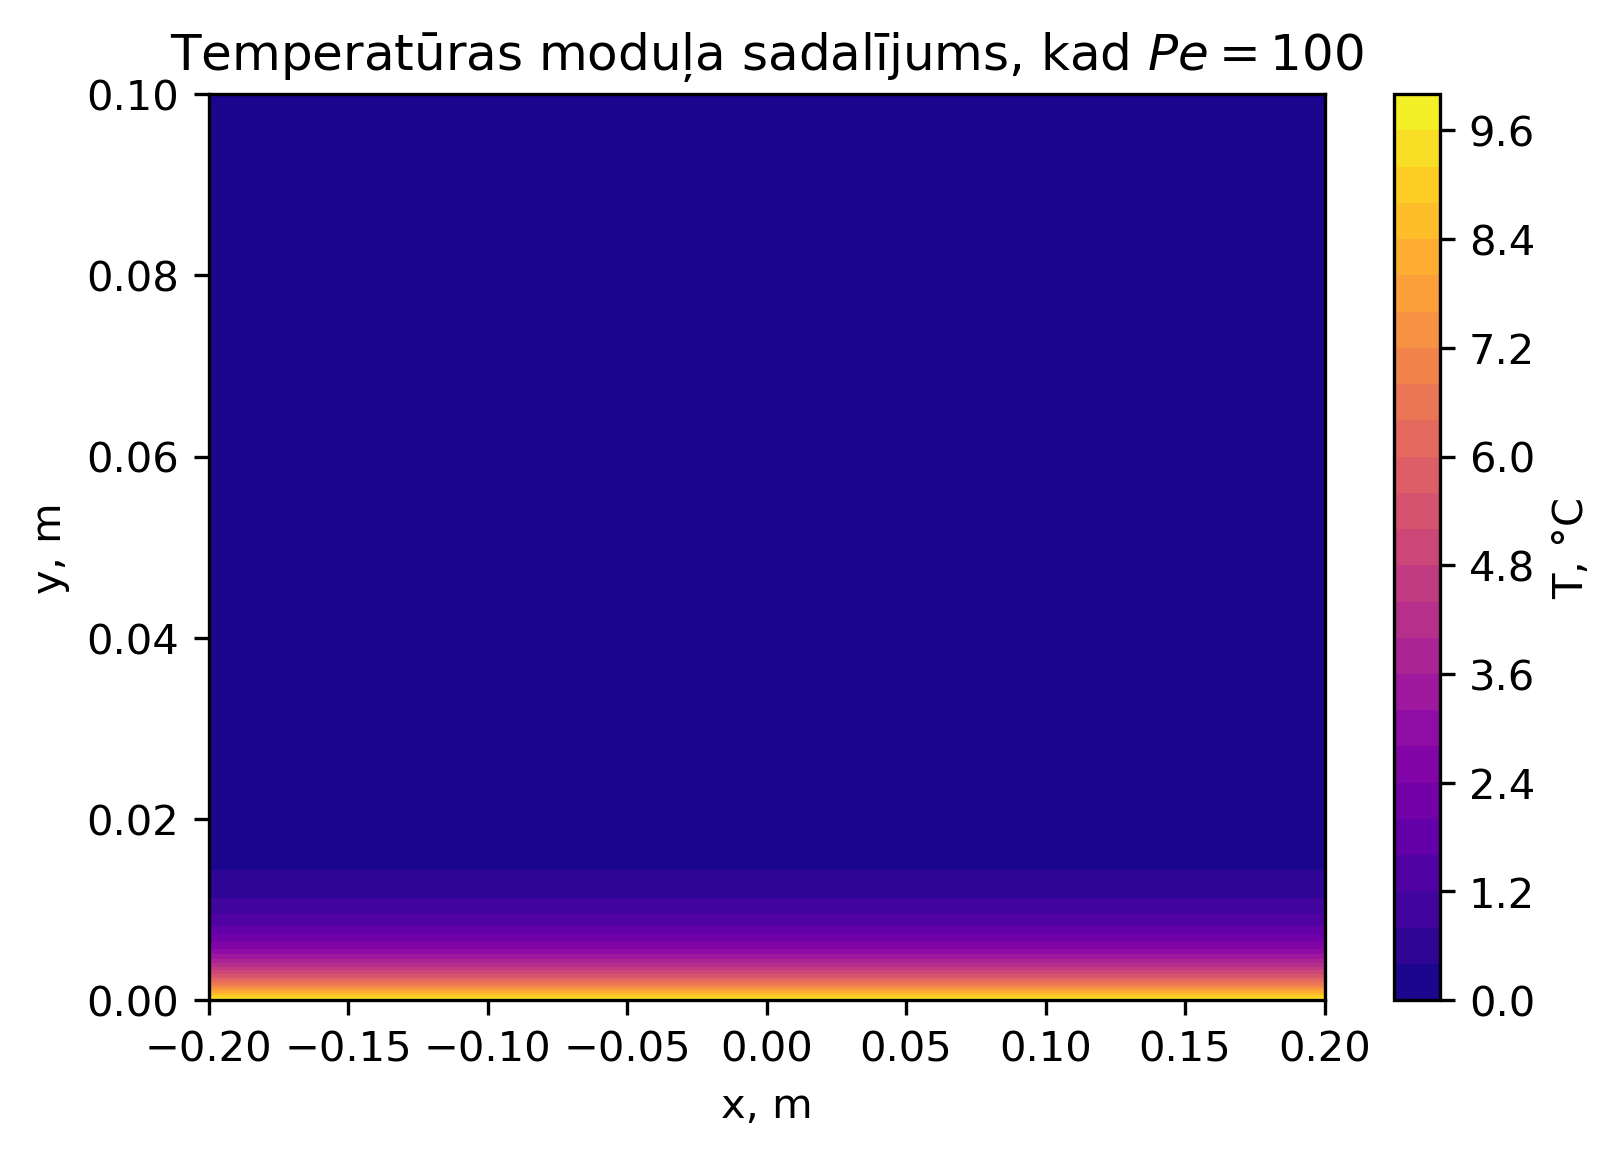

In [1]:
#Konstantes un paketes
import numpy as np
import matplotlib.pyplot as plt


T_0 = 10 # °C
TAU = 0.1  # m
ALPHA = np.pi / TAU
peclet = np.array([0, 1, 2, 5, 10, 20, 50, 100])
LAMBDA = ALPHA * np.sqrt(1 + 1j * peclet)

# Koordinātu režģis
X = np.linspace(-2*TAU, 2*TAU, 400)
Y = np.linspace(0, TAU, 1000)
x,y = np.meshgrid(X,Y)


def temperature(x, y, _lambda):
    """Atgriež temperatūru punktā (x,y) atkarībā no Peklē skaitļa"""
    return np.real(T_0 * np.exp(-_lambda*y) * np.exp(1j*ALPHA*x))


def mod_temperature(x, y, _lambda):
    """Atgriež temperatūras moduli punktā (x,y) atkarībā no Peklē skaitļa"""
    return T_0 * np.exp(-np.real(_lambda)*y)


for idx, l in enumerate(LAMBDA):
    # Temperatūra
    t = temperature(x, y, l)

    fig, ax = plt.subplots(dpi=300)
    contour = ax.contourf(x,y,t, cmap="plasma", levels=30)
    cbar = plt.colorbar(contour)
    cbar.set_label("T, °C")
    plt.title(f"Temperatūras sadalījums, kad $Pe = {peclet[idx]}$")
    plt.xlabel("x, m")
    plt.ylabel("y, m")
    plt.show()

    # Temperatūras modulis
    tmod = mod_temperature(x,y, l)

    fig, ax = plt.subplots(dpi=300)

    contour = ax.contourf(x,y,tmod, cmap="plasma", levels=30)
    cbar = plt.colorbar(contour)
    cbar.set_label("T, °C")
    plt.title(f"Temperatūras moduļa sadalījums, kad $Pe = {peclet[idx]}$")
    plt.xlabel("x, m")
    plt.ylabel("y, m")
    plt.show()

## 2. uzdevums {-}

Palielinoties Peklē skaitlim, ir redzams, ka temperatūras sadalījums, ko rada periodiski sildītā/dzesētā plāksne, tiek "nobīdīts" plūsmas ātruma virzienā. Tas ir loģiski, jo ar lielāku Peklē skaitli, šķidruma plūsma "efektīvāk" pārnes siltumu tās kustības virzienā un mazāka daļa tiek difūzi pārnesta uz augšu.

## 3. uzdevums

Temperatūras modulis parāda temperatūras izmaiņu $y$ virzienā, neņemot vērā, ka virsma ir periodiski uzsildīta / dzesēta, bet gan it kā viss pamats būtu vienmērīgi, 10° C silts. Tā kā temperatūras svārstības tika iegūtas, paņemot tikai reālo daļu no kompleksa skaitļa, tad paņemot absolūto vērtību, šīs svārstības vairs nebūs.

Ir redzams, ka pieaugot Peklē skaitlim, $y$ ass virzienā temperatūra var mazāk difundēt jeb siltais reģions ir tuvāk pamatam. Tas ir tāpēc, ka pieaugot Peklē skaitlim, lielāka daļa siltuma ir aizvadīta ar konvekciju, nevis difūziju.

## 4. uzdevums

Termiskā robežslāņa biezumu var izteikt kā $$\delta = \frac{L}{\sqrt{Pe}}$$, kur $L$ - raksturīgais izmērs un $Pe$ - Peklē skaitlis. Šajā gadījumā (dots sistēmas aprakstā) raksturīgais izmērs ir $L = \frac{1}{\alpha} = \frac{\tau}{\pi}$, kur $\tau$ - pusviļņa garums .

In [2]:
boundary = (1/ALPHA)/np.sqrt(peclet[1:])
for pe, delta in zip(peclet[1:], boundary):
    print(f"Robežslāņa biezums, kad Pe = {pe}: {delta*1000:.2f} mm")

Robežslāņa biezums, kad Pe = 1: 31.83 mm
Robežslāņa biezums, kad Pe = 2: 22.51 mm
Robežslāņa biezums, kad Pe = 5: 14.24 mm
Robežslāņa biezums, kad Pe = 10: 10.07 mm
Robežslāņa biezums, kad Pe = 20: 7.12 mm
Robežslāņa biezums, kad Pe = 50: 4.50 mm
Robežslāņa biezums, kad Pe = 100: 3.18 mm


Ir redzams, ka pieaugot Peklē skaitlim, samazinās robežslāņa biezums. Tas ir loģiski, jo termisko robežslāni var arī definēt kā attālumu, aiz kura var neievērot siltuma difūzo pārnesi. Palielinoties Peklē skaitlim, šis attālums samazinās, jo vairāk siltums tiek pārnests konvektīvi, bet mazāk - difūzi.

Jāpievērš uzmanība gadījumam, kad $Pe = 0$, jo tad robežslāņa biezums tiecas uz bezgalību. Ja $Pe = 0$, tas nozīmē, ka konvektīvi siltums neizplatīsies, būs tikai siltuma difūzā izplatīšanās. Līdz ar to nav neviens attālums, kurā var neievērot difūziju - tā būs svarīga visos attālumos, līdz ar to nevar ieviest robežslāni.